Logistic Regression

Dataset from: https://www.kaggle.com/c/titanic/data

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read in train+test datasets
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print("Train size:", train.shape)
print("Test size:", test.shape)
train.head()

Train size: (891, 12)
Test size: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check the integrity of dataset
print("Train data:\n", train.isnull().sum(), "\n")
print("Test data:\n", test.isnull().sum())

Train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
age_mean=train['Age'].mean(skipna=True)
embarked_max=train['Embarked'].value_counts().idxmax()
fare_mean=train['Fare'].mean(skipna=True)

print("Mean value of age:", age_mean)
print("Count of embarked:\n", embarked_max)
print("Mean of fare:", fare_mean)

Mean value of age: 29.69911764705882
Count of embarked:
 S
Mean of fare: 32.2042079685746


In [ ]:
# Drop the cabin column because it has too many null values
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [ ]:
# Fill in the empty data
train['Age'].fillna(age_mean, inplace=True)
train['Embarked'].fillna(embarked_max, inplace=True)

test['Age'].fillna(age_mean, inplace=True)
test['Fare'].fillna(fare_mean, inplace=True)

# Convert sex column into numerical
def gender(x):
  if x=='male': return 1
  else: return 0

train['Sex_Male'] = train['Sex'].apply(gender) 
test['Sex_Male'] = train['Sex'].apply(gender) 

# Drop sex column
train.drop(columns=['Sex'], inplace=True)
test.drop(columns=['Sex'], inplace=True)

In [ ]:
# Also converting to numberical 
train=pd.get_dummies(train, columns=["Pclass","Embarked"])
test=pd.get_dummies(test, columns=["Pclass","Embarked"])

In [ ]:
# Check the integrity of dataset after
print("Train data:\n", train.isnull().sum(), "\n")
print("Test data:\n", test.isnull().sum())

Train data:
 PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_Male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64 

Test data:
 PassengerId    0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_Male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_Male         int64
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [ ]:
# Feature selection
cols = train.columns.values
print(cols)

['PassengerId' 'Survived' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Sex_Male' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Embarked_C' 'Embarked_Q'
 'Embarked_S']


Wrapping Linear Regression equation into logistic function where output probability is between 0-1

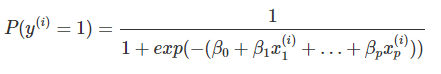

In [ ]:
cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

X = train[cols]
y = train['Survived']

# Logistic Regression 
# Selecting features using RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

num_features = rfecv.n_features_
selected_features = list(X.columns[rfecv.support_])

print("Optimal number of features:", num_features)
print('Selected features:', selected_features)

Optimal number of features: 11
Selected features: ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


Accuracy: 0.7821229050279329
Log_loss: 0.5106596284065511
Auc: 0.829746835443038


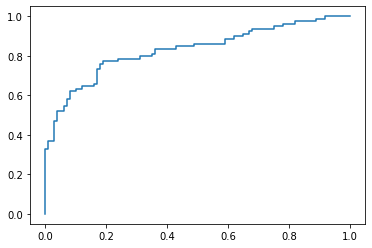

In [ ]:
# Features and Response
X = train[selected_features]
y = train['Survived']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# ROC 
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log_loss:", log_loss(y_test, y_pred_proba))
print("Auc:", auc(fpr, tpr))


# Plotting
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % auc(fpr, tpr))

plt.show()

In [ ]:
test['Survived'] = logreg.predict(test[selected_features])
test['PassengerId'] = test['PassengerId']

submission = test[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,0
415,1307,0
416,1308,1
417,1309,1
